In [37]:
#Memanggil fungsi
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os
os.getcwd()

'C:\\Users\\LENOVO'

In [3]:
#Memanggil data
dataset = pd.read_csv('\\Users\\LENOVO\\Medical_Conditions.csv')
dataset.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ02,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,...,5.0,1.0,3.0,134671.37040,135629.50740,1,125,10.0,10.0,4.39
1,83733,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,3.0,3.0,NaN,24328.56024,25282.42593,1,125,4.0,4.0,1.32
2,83734,1.0,60.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,...,3.0,1.0,3.0,12400.00852,12575.83882,1,131,5.0,5.0,1.51
3,83735,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,...,5.0,6.0,NaN,102717.99560,102078.63450,1,131,10.0,10.0,5.00
4,83736,1.0,10.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0,...,4.0,3.0,NaN,17627.67498,18234.73622,2,126,7.0,7.0,1.23


In [8]:
#Slicing data yang diperlukan
#Keterangan:
#SEQN: Respondent sequence; RIAGENDR: Gender; RIDAGEYR: Age in year screening
#MCQ160A: Doctor vonis arthritis; MCQ180A: Age vonis arthritis; MCQ195: Type of arthritis)
data = dataset[['SEQN','RIAGENDR','RIDAGEYR','MCQ160A','MCQ180A','MCQ195']]
data.head()

,SEQN,RIAGENDR,RIDAGEYR,MCQ160A,MCQ180A,MCQ195
0,83732,1,62,1.0,40.0,1.0
1,83733,1,53,2.0,NaN,NaN
2,83734,1,78,1.0,55.0,4.0
3,83735,2,56,2.0,NaN,NaN
4,83736,2,42,1.0,10.0,9.0


In [85]:
#Mengecek missing value
data.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
MCQ160A       11
MCQ180A     4286
MCQ195      4249
dtype: int64

In [86]:
#Penanganan missing value
#Penghapusan data pasien yang tidak terkena arthritis
data1 = data.dropna(subset=["MCQ195"], axis=0)
data1.head()

,SEQN,RIAGENDR,RIDAGEYR,MCQ160A,MCQ180A,MCQ195
0,83732,1,62,1.0,40.0,1.0
2,83734,1,78,1.0,55.0,4.0
4,83736,2,42,1.0,10.0,9.0
9,83747,1,46,1.0,46.0,2.0
10,83750,1,45,1.0,44.0,9.0


In [87]:
#Mengecek missing value
data1.isnull().sum()

SEQN         0
RIAGENDR     0
RIDAGEYR     0
MCQ160A      0
MCQ180A     37
MCQ195       0
dtype: int64

In [88]:
#Penanganan missing value
#Dapat diketahui bahwa ada kemungkinan responden tidak mengisi usia saat divonis memiliki arthritis
#Digunakan penanganan missing value dengan fungsi replace mean
mean = data1["MCQ180A"].mean()
data1["MCQ180A"] = data1["MCQ180A"].fillna(mean)
data1.head()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_13788/4050759658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["MCQ180A"] = data1["MCQ180A"].fillna(mean)


,SEQN,RIAGENDR,RIDAGEYR,MCQ160A,MCQ180A,MCQ195
0,83732,1,62,1.0,40.0,1.0
2,83734,1,78,1.0,55.0,4.0
4,83736,2,42,1.0,10.0,9.0
9,83747,1,46,1.0,46.0,2.0
10,83750,1,45,1.0,44.0,9.0


In [89]:
#Mengecek missing value
data1.isnull().sum()

SEQN        0
RIAGENDR    0
RIDAGEYR    0
MCQ160A     0
MCQ180A     0
MCQ195      0
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MCQ180A'>

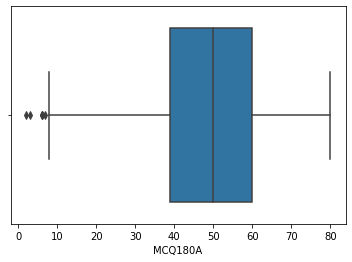

In [90]:
#Mendeteksi data oulier di Usia
#Box Plot Usia (MCQ180A)
sns.boxplot(data1.MCQ180A)

In [91]:
#Penanganan outlier usia (MCQ180A)
#Metode IQR - Inter Quartile Range
def detect_outliers(s):
    Q1 = np.quantile(s,0.25)
    Q3 = np.quantile(s,0.75)
    IQR = Q3-Q1
    upper_bound = np.quantile(s, 0.75)+(1.5*IQR)
    lower_bound = np.quantile(s, 0.25)-(1.5*IQR)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    d = {'IQR': IQR, 'Upper Bound': upper_bound, 'Lower Bound': lower_bound, 'Sum Outliers': sums}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return d
detect_outliers(data1.MCQ180A)

,sub,values
0,IQR,21.0
1,Upper Bound,91.5
2,Lower Bound,7.5
3,Sum Outliers,6.0


In [96]:
#Penanganan outlier usia (MCQ180A)
#Penghapusan data outlier

data2 = data1[data1['MCQ180A'] > 7.5]
data2.head()

,SEQN,RIAGENDR,RIDAGEYR,MCQ160A,MCQ180A,MCQ195
0,83732,1,62,1.0,40.0,1.0
2,83734,1,78,1.0,55.0,4.0
4,83736,2,42,1.0,10.0,9.0
9,83747,1,46,1.0,46.0,2.0
10,83750,1,45,1.0,44.0,9.0


In [102]:
#KESIMPULAN

#Data Asli
print("data asli adalah sebanyak :", dataset.shape)

#Data setelah penanganan data missing
print("data tanpa data missing sebanyak :", data1.shape)

#Data setelah penanganan ouutlier
print("data akhir tanpa outlier sebanyak :", data2.shape)

data asli adalah sebanyak : (5719, 123)
data tanpa data missing sebanyak : (1470, 6)
data akhir tanpa outlier sebanyak : (1464, 6)


In [97]:
#Export data hasil olahan
df = data2
df.to_csv(r'C:\\Users\\LENOVO\\Downloads\\TA_038_039.csv',index = False, header = True)

#### Data sudah bisa digunakan